In [48]:
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [3]:
BASE = Path(r"C:\Users\patri\Desktop\Folders\Data\Solo Projects\Friday_Mini_Projects\Olist_2025_11_07")
RAW = BASE / "data_raw"

files = {
    "orders": "olist_orders_dataset.csv",
    "order_items": "olist_order_items_dataset.csv",
    "customers": "olist_customers_dataset.csv",
    "sellers": "olist_sellers_dataset.csv",
    "geolocation": "olist_geolocation_dataset.csv",
    "payments": "olist_order_payments_dataset.csv",
    "reviews": "olist_order_reviews_dataset.csv",
    "products": "olist_products_dataset.csv",
    "product_cat": "product_category_name_translation.csv",
}

dfs = {name: pd.read_csv(RAW / fname) for name, fname in files.items()}

for name, df in dfs.items():
    print(f"\n=== {name.upper()} ===")


=== ORDERS ===

=== ORDER_ITEMS ===

=== CUSTOMERS ===

=== SELLERS ===

=== GEOLOCATION ===

=== PAYMENTS ===

=== REVIEWS ===

=== PRODUCTS ===

=== PRODUCT_CAT ===


In [4]:
df.shape

(71, 2)

In [5]:
df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [6]:
df.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [8]:
products = dfs["products"]
product_cat = dfs["product_cat"]

products = products.merge(product_cat, on="product_category_name", how="left")

products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [9]:
products.shape

(32951, 10)

In [10]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB


In [11]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [12]:
products = products.rename(columns={
    'product_name_lenght': 'product_name_length',
    'product_description_lenght': 'product_description_length',
    'product_category_name_english': 'category'
})

In [13]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
 9   category                    32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB


In [14]:
print('products shape:', products.shape)

# PK checks
null_ids = products['product_id'].isna().sum()
dup_ids = products['product_id'].duplicated().sum()
print(f'null product_id: {null_ids}')
print(f'duplicate product_id: {dup_ids}')

# see if dups exist
if dup_ids > 0:
    dups = products[products['product_id'].duplicated(keep=False)].sort_values('product_id')
    print('\nexamples of duplicate product_id rows:')
    display(dups.head(10))

# category translation coverage
missing_cat = products['category'].isna().sum()
print(f'\nproducts missing english category: {missing_cat}')

# if any missing, see which port names caused it
if missing_cat > 0:
    unmapped = (products[products['category'].isna()]
                ['product_category_name']
                .value_counts()
                .head(10))
    print('\nmost common unmapped portuguese categories:')
    print(unmapped)

products shape: (32951, 10)
null product_id: 0
duplicate product_id: 0

products missing english category: 623

most common unmapped portuguese categories:
product_category_name
portateis_cozinha_e_preparadores_de_alimentos    10
pc_gamer                                          3
Name: count, dtype: int64


In [15]:
# create cat column with no missing values
products['category_clean'] = products['category'].fillna(products['product_category_name'])

#sanity check
print('missing in category_clean:', products['category_clean'].isna().sum())

# look at two in unmapped list
print(products.query("product_category_name in ['portateis_cozinha_e_preparadores_de_alimentos','pc_gamer']")
                [['product_category_name','category','category_clean']]
                .head(8))

missing in category_clean: 610
                               product_category_name category  \
1628                                        pc_gamer      NaN   
5821   portateis_cozinha_e_preparadores_de_alimentos      NaN   
7325   portateis_cozinha_e_preparadores_de_alimentos      NaN   
7478                                        pc_gamer      NaN   
8819   portateis_cozinha_e_preparadores_de_alimentos      NaN   
11039  portateis_cozinha_e_preparadores_de_alimentos      NaN   
14266  portateis_cozinha_e_preparadores_de_alimentos      NaN   
16182  portateis_cozinha_e_preparadores_de_alimentos      NaN   

                                      category_clean  
1628                                        pc_gamer  
5821   portateis_cozinha_e_preparadores_de_alimentos  
7325   portateis_cozinha_e_preparadores_de_alimentos  
7478                                        pc_gamer  
8819   portateis_cozinha_e_preparadores_de_alimentos  
11039  portateis_cozinha_e_preparadores_de_alimentos 

In [16]:
# fill remaining missing with 'unknown' since its 610 / 33k
products['category_clean'] = products['category_clean'].fillna('unknown')

#sanity check
print('missing in category_clean after fix:', products['category_clean'].isna().sum())
products['category_clean'].value_counts().head()

missing in category_clean after fix: 0


category_clean
bed_bath_table     3029
sports_leisure     2867
furniture_decor    2657
health_beauty      2444
housewares         2335
Name: count, dtype: int64

In [17]:
print('Weight summary:')
print(products['product_weight_g'].describe())

# extreme values
print('\nProducts with 0g weight:')
print(products[products['product_weight_g'] == 0].shape[0])

Weight summary:
count    32949.000000
mean      2276.472488
std       4282.038731
min          0.000000
25%        300.000000
50%        700.000000
75%       1900.000000
max      40425.000000
Name: product_weight_g, dtype: float64

Products with 0g weight:
4


In [18]:
# remove products with 0g weight
products = products[products['product_weight_g'] > 0]

#sanity check
print('After cleaning, new min weight:', products['product_weight_g'].min())
print('New shape:', products.shape)

After cleaning, new min weight: 2.0
New shape: (32945, 11)


In [19]:
# columns to check
dim_cols = ['product_length_cm', 'product_height_cm', 'product_width_cm']

# quick summary
print(products[dim_cols].describe())

# count obviously bad values: <= 0 or unrealistically large (> 200 cm)
for c in dim_cols:
    bad = (products[c] <= 0) | (products[c] > 200)
    print(f'{c} bad count:', bad.sum())

    #look at a few bad rows (if any)
    if bad.sum() > 0:
        display(products.loc[bad, ['product_id', 'category_clean', c]].head(10))

       product_length_cm  product_height_cm  product_width_cm
count       32945.000000       32945.000000      32945.000000
mean           30.815177          16.936682         23.195902
std            16.915482          13.638093         12.079548
min             7.000000           2.000000          6.000000
25%            18.000000           8.000000         15.000000
50%            25.000000          13.000000         20.000000
75%            38.000000          21.000000         30.000000
max           105.000000         105.000000        118.000000
product_length_cm bad count: 0
product_height_cm bad count: 0
product_width_cm bad count: 0


In [20]:
orders = dfs['orders']

print('Orders shape:', orders.shape)
print('\nColumn names:', list(orders.columns))
print('\nPreview:')
display(orders.head(5))

Orders shape: (99441, 8)

Column names: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

Preview:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [21]:
order_items = dfs['order_items']

print('Order Items shape:', order_items.shape)
print('\nColumn names:', list(order_items.columns))
print('\nPreview:')
display(order_items.head(5))

Order Items shape: (112650, 7)

Column names: ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

Preview:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [22]:
missing_orders = order_items[~order_items['order_id'].isin(orders['order_id'])]
print('order items with missing order_id in orders:', missing_orders.shape[0])

order items with missing order_id in orders: 0


In [23]:
# keep only the order columns we actually need right now
orders_min = orders[['order_id', 'order_status', 'order_purchase_timestamp']]

#merge: every item gets its order's status and purchase time
order_lines = order_items.merge(orders_min, on='order_id', how='inner')

#sanity check
print('order_lines shape:', order_lines.shape)
print('missing order_status after merge:',
      order_lines['order_status'].isna().sum())
order_lines.head()

order_lines shape: (112650, 9)
missing order_status after merge: 0


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_status,order_purchase_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,delivered,2017-09-13 08:59:02
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,delivered,2017-04-26 10:53:06
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,delivered,2018-01-14 14:33:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,delivered,2018-08-08 10:00:35
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,delivered,2017-02-04 13:57:51


In [24]:
# status distribution (count and %)
print(order_lines['order_status'].value_counts())
print('\n% share:')
print((order_lines['order_status'].value_counts(normalize=True) * 100).round(2))

order_status
delivered      110197
shipped          1185
canceled          542
invoiced          359
processing        357
unavailable         7
approved            3
Name: count, dtype: int64

% share:
order_status
delivered      97.82
shipped         1.05
canceled        0.48
invoiced        0.32
processing      0.32
unavailable     0.01
approved        0.00
Name: proportion, dtype: float64


In [25]:
#keep only delivered orders
order_lines_delivered = order_lines[order_lines['order_status'] == 'delivered']

#sanity check
print('new shape:', order_lines_delivered.shape)
print('% of original data kept:', round(len(order_lines_delivered) / len(order_lines) * 100, 2))

new shape: (110197, 9)
% of original data kept: 97.82


In [26]:
#merge delivered order lines with product info
order_products = order_lines_delivered.merge(
    products,
    on='product_id',
    how='left'
)

#sanity check
print('new shape:', order_products.shape)
print('missing product info after merge:', order_products['category_clean'].isna().sum())
order_products.head()

new shape: (110197, 19)
missing product info after merge: 26


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_status,order_purchase_timestamp,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,category,category_clean
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,delivered,2017-09-13 08:59:02,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,delivered,2017-04-26 10:53:06,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,delivered,2018-01-14 14:33:31,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,delivered,2018-08-08 10:00:35,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,delivered,2017-02-04 13:57:51,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,garden_tools


In [27]:
# find rows with missing category info
missing_products = order_products[order_products['category_clean'].isna()]

print('missing product rows:', missing_products.shape[0])
display(missing_products.head(10))

missing product rows: 26


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_status,order_purchase_timestamp,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,category,category_clean
2904,06afc1144eb9f51ef2aa90ec9223c7f4,1,e673e90efa65a5409ff4196c038bb5af,b39d7fe263ef469605dbb32608aee0af,2018-08-23 17:25:20,129.9,23.71,delivered,2018-08-15 17:13:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2905,06afc1144eb9f51ef2aa90ec9223c7f4,2,e673e90efa65a5409ff4196c038bb5af,b39d7fe263ef469605dbb32608aee0af,2018-08-23 17:25:20,129.9,23.71,delivered,2018-08-15 17:13:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2984,06d9e69034388abf6da64378e10737b8,1,36ba42dd187055e1fbe943b2d11430ca,b39d7fe263ef469605dbb32608aee0af,2018-08-10 09:10:11,100.0,23.85,delivered,2018-07-30 10:42:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985,06d9e69034388abf6da64378e10737b8,2,36ba42dd187055e1fbe943b2d11430ca,b39d7fe263ef469605dbb32608aee0af,2018-08-10 09:10:11,100.0,23.85,delivered,2018-07-30 10:42:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6960,101157d4fae1c9fb74a00a5dee265c25,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-11 08:02:26,29.0,14.52,delivered,2017-04-03 07:54:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9032,1521c6bb7b1028154c8c67cf80fa809f,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-07 10:10:16,29.0,16.05,delivered,2017-04-02 10:00:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13757,200b121c28e10ef638131a7c76753327,1,81781c0fed9fe1ad6e8c81fca1e1cb08,b39d7fe263ef469605dbb32608aee0af,2018-08-14 16:10:16,100.0,19.89,delivered,2018-08-04 15:55:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28069,415cfaaaa8cea49f934470548797fed1,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-07 10:35:19,29.0,14.52,delivered,2017-04-02 10:25:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28070,415cfaaaa8cea49f934470548797fed1,2,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-07 10:35:19,29.0,14.52,delivered,2017-04-02 10:25:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30779,476b812a7e4fc972646eb390517bddcb,1,e673e90efa65a5409ff4196c038bb5af,b39d7fe263ef469605dbb32608aee0af,2018-08-22 11:30:42,129.9,23.71,delivered,2018-08-18 11:09:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# fill missing category info with 'unknown'
order_products['category_clean'] = order_products['category_clean'].fillna('unknown')

#sanity check
print('missing category_clean after fix:', order_products['category_clean'].isna().sum())
print("\nMost common categories including 'unknown':")
print(order_products['category_clean'].value_counts().head(10))

missing category_clean after fix: 0

Most common categories including 'unknown':
category_clean
bed_bath_table           10945
health_beauty             9465
sports_leisure            8431
furniture_decor           8160
computers_accessories     7644
housewares                6795
watches_gifts             5859
telephony                 4430
garden_tools              4268
auto                      4140
Name: count, dtype: int64


In [29]:
# check for missing or invalid prices and freight values
print("Missing prices:", order_products['price'].isna().sum())
print("Missing freight values:", order_products['freight_value'].isna().sum())

# check for zeros or negatives
print("\nRows with non-positive prices:", (order_products['price'] <= 0).sum())
print("Rows with non-positive freight values:", (order_products['freight_value'] <= 0).sum())

Missing prices: 0
Missing freight values: 0

Rows with non-positive prices: 0
Rows with non-positive freight values: 381


In [30]:
# preview rows with zero frieght values
zero_freight = order_products[order_products['freight_value'] <= 0]
print('zero_fright rows:', zero_freight.shape[0])
display(zero_freight.head(10))

zero_fright rows: 381


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_status,order_purchase_timestamp,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,category,category_clean
112,00404fa7a687c8c44ca69d42695aae73,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-15 04:31:26,99.9,0.0,delivered,2018-05-07 22:38:21,relogios_presentes,33.0,523.0,3.0,584.0,16.0,11.0,13.0,watches_gifts,watches_gifts
256,00a870c6c06346e85335524935c600c0,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-14 00:14:29,69.9,0.0,delivered,2018-05-09 00:10:08,moveis_decoracao,44.0,903.0,6.0,2600.0,50.0,10.0,30.0,furniture_decor,furniture_decor
478,011c899816ea29773525bd3322dbb6aa,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-07 05:30:45,99.9,0.0,delivered,2018-04-30 15:02:34,relogios_presentes,33.0,523.0,3.0,584.0,16.0,11.0,13.0,watches_gifts,watches_gifts
503,012b3f6ab7776a8ab3443a4ad7bef2e6,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.0,delivered,2018-05-04 21:18:05,ferramentas_jardim,56.0,348.0,2.0,1550.0,30.0,22.0,30.0,garden_tools,garden_tools
504,012b3f6ab7776a8ab3443a4ad7bef2e6,2,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.0,delivered,2018-05-04 21:18:05,ferramentas_jardim,56.0,348.0,2.0,1550.0,30.0,22.0,30.0,garden_tools,garden_tools
1751,04105b54650921ca3246f52e6f175f46,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-04-27 09:31:35,69.9,0.0,delivered,2018-04-23 09:07:38,moveis_decoracao,44.0,903.0,6.0,2600.0,50.0,10.0,30.0,furniture_decor,furniture_decor
2193,0517a3e68dac3308995edca2144db36e,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-03 19:11:40,99.9,0.0,delivered,2018-04-26 18:53:02,relogios_presentes,33.0,523.0,3.0,584.0,16.0,11.0,13.0,watches_gifts,watches_gifts
2654,061ba2e2d7544790b6ed6b5b4dd9278c,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-09 23:10:46,110.0,0.0,delivered,2018-05-03 22:56:36,relogios_presentes,33.0,523.0,3.0,584.0,16.0,11.0,13.0,watches_gifts,watches_gifts
3155,07441f525824bc6b31d4dc19c5d49fc9,1,53b36df67ebb7c41585e8d54d6772e08,4869f7a5dfa277a7dca6462dcf3b52b2,2018-04-26 13:31:30,106.9,0.0,delivered,2018-04-21 13:07:41,relogios_presentes,33.0,523.0,3.0,584.0,16.0,11.0,13.0,watches_gifts,watches_gifts
3305,079f16689c29acb6cab92978e6af2137,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-11 18:15:13,69.9,0.0,delivered,2018-05-09 18:01:29,moveis_decoracao,44.0,903.0,6.0,2600.0,50.0,10.0,30.0,furniture_decor,furniture_decor


In [31]:
#checking if 0 weight are intentional (promos) or data errors
zf = order_products[order_products['freight_value'] <= 0]

print('zero_freight rows:', len(zf))
print('with positive price:', (zf['price'] > 0).sum())
print('with zero price tool:', (zf['price'] <= 0).sum())

print('\nTop sellers using zero freight:')
print(zf['seller_id'].value_counts().head(10))

print('\nTop categories in zero freight:')
print(zf['category_clean'].value_counts().head(10))

zero_freight rows: 381
with positive price: 381
with zero price tool: 0

Top sellers using zero freight:
seller_id
7d13fca15225358621be4086e1eb0964    157
955fee9216a65b617aa5c0531780ce60     98
1f50f920176fa81dab994f9023523100     56
4869f7a5dfa277a7dca6462dcf3b52b2     56
37be5a7c751166fbc5f8ccba4119e043      9
c826c40d7b19f62a09e2d7c5e7295ee2      2
bc2ac6b95e1accce9858528ee566c17e      1
cc419e0650a3c5ba77189a1882b7556a      1
8581055ce74af1daba164fdbd55a40de      1
Name: count, dtype: int64

Top categories in zero freight:
category_clean
watches_gifts       213
furniture_decor      97
garden_tools         56
bed_bath_table        9
unknown               2
books_imported        1
health_beauty         1
office_furniture      1
auto                  1
Name: count, dtype: int64


In [32]:
#looks like intentional, creating column for this data
order_products['is_free_shipping'] = (order_products['freight_value'] == 0)

#sanity check
print(order_products['is_free_shipping'].value_counts(normalize=True))

is_free_shipping
False    0.996543
True     0.003457
Name: proportion, dtype: float64


In [33]:
# keep the essential, analysis-friendly columns
cols = [
    'order_id','order_item_id','product_id','seller_id',
    'order_purchase_timestamp',
    'category_clean','price','freight_value','is_free_shipping'
]

tidy = order_products[cols].copy()

# make a processed folder and write files
outdir = Path('data_processed')
outdir.mkdir(exist_ok=True)

csv_path = outdir / 'order_products_clean.csv'
parquet_path = outdir / 'order_products_clean.parquet'

tidy.to_csv(csv_path, index=False)
tidy.to_parquet(parquet_path, index=False)

print('saved:', csv_path, 'and', parquet_path)
print('rows, cols =', tidy.shape)


saved: data_processed\order_products_clean.csv and data_processed\order_products_clean.parquet
rows, cols = (110197, 9)


In [40]:
#clean file
df = pd.read_csv('data_processed/order_products_clean.csv',
                 parse_dates=['order_purchase_timestamp'])

#columns
df = df[['price', 'freight_value', 'category_clean', 'order_purchase_timestamp', 'is_free_shipping']].copy()

#sanity checks
print('Rows, cols:', df.shape)
print('missing freight:', df['freight_value'].isna().sum())
print(df[['price', 'freight_value']].describe().T)

#simple baseline, predict same value for global mean freight for every row
y = df['freight_value'].values
baseline_pred = np.full_like(y, fill_value=y.mean(), dtype=float)

mae = np.mean(np.abs(y - baseline_pred))
print('\nBaseline (predict global mean freight) - MAE:', round(mae, 2))

Rows, cols: (110197, 5)
missing freight: 0
                  count        mean         std   min    25%    50%     75%  \
price          110197.0  119.980563  182.299446  0.85  39.90  74.90  134.17   
freight_value  110197.0   19.948598   15.698136  0.00  13.08  16.26   21.15   

                   max  
price          6735.00  
freight_value   409.68  

Baseline (predict global mean freight) - MAE: 8.6


In [43]:
#features/target
X = df[['price', 'is_free_shipping', 'freight_value', 'category_clean', 'order_purchase_timestamp']].copy()
y = df['freight_value'].values #target

#drop target leak if present: don't want to include freight_value as a feature
X = X.drop(columns=['freight_value'], errors='ignore')

#age in days from order_purchase_timestamp
X['order_age_days'] = (X['order_purchase_timestamp'].max() - X['order_purchase_timestamp']).dt.days
X = X.drop(columns=['order_purchase_timestamp'])

#80/20

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#preprocessing columns, one-hot encoding
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['category_clean']),
    ],
    remainder='passthrough'  #keep numeric columns
)

#fit on train / transform on test
X_train_final = preprocess.fit_transform(X_train)
X_test_final = preprocess.transform(X_test)

#train and evaluate
model = LinearRegression()
model.fit(X_train_final, y_train)
y_pred = model.predict(X_test_final)
mae = mean_absolute_error(y_test, y_pred)
print('linear regression MAE:', round(mae, 2))

linear regression MAE: 7.48


In [45]:
#copy from the same df, dont want to use is_free_shipping because its derived from the target freight_value == 0 which would leak the answer
X = df[['price', 'category_clean', 'order_purchase_timestamp']].copy()
y = df['freight_value'].values

#feature eng: log-price and order age
X['log_price'] = np.log1p(X['price'])
X['order_age_days'] = (X['order_purchase_timestamp'].max() - X['order_purchase_timestamp']).dt.days
X = X.drop(columns=['order_purchase_timestamp', 'price'])

#80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#pass through log_price and order_age_days
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['category_clean']),
    ],
    remainder='passthrough' #keeps ['log_price', 'order_age_days']
)

#fit on train / transform on test
X_train_final = preprocess.fit_transform(X_train)
X_test_final = preprocess.transform(X_test)

#model
model = LinearRegression()
model.fit(X_train_final, y_train)
y_pred = model.predict(X_test_final)
mae = mean_absolute_error(y_test, y_pred)
print('linear regression (with log_price) MAE:', round(mae, 2))

linear regression (with log_price) MAE: 7.91


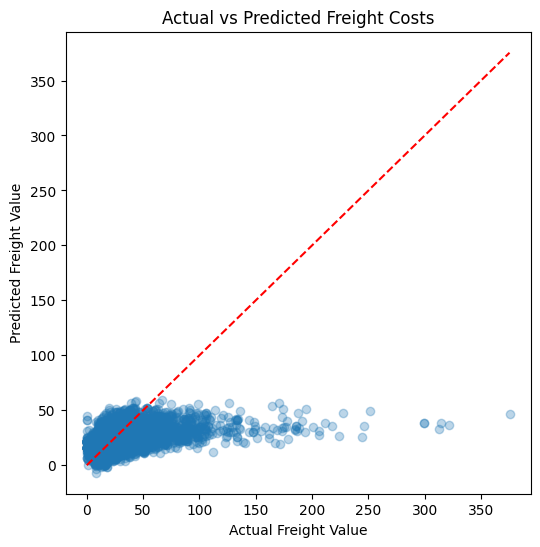

In [49]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Freight Value')
plt.ylabel('Predicted Freight Value')
plt.title('Actual vs Predicted Freight Costs')
plt.show()

# Olist Freight Value Analysis

## 📦 Project Overview
This project explores the **Olist e-commerce dataset**, focusing on how product attributes (like price and category) relate to **freight cost** — the delivery charge per order item.

The goal was to clean and prepare multiple raw CSV files, merge them into a single usable dataset, and build a **simple regression model** to predict freight value.  
This project demonstrates the full end-to-end process of **data wrangling, analysis, feature engineering, model training, and evaluation.**

---

## 🧹 Data Preparation
We began with several Olist data files, including:
- `olist_orders_dataset.csv`
- `olist_order_items_dataset.csv`
- `olist_products_dataset.csv`
- `product_category_name_translation.csv`

### Key Cleaning Steps
1. **Merged and standardized datasets** by common keys (`order_id`, `product_id`).
2. **Handled missing values:**
   - Translated Portuguese product categories to English.
   - Replaced missing category names with `"unknown"`.
   - Removed products with invalid weights (`0g`).
3. **Fixed outliers and logical errors:**
   - Verified product dimensions (`length`, `height`, `width`) within realistic bounds.
   - Identified and tagged free-shipping items (`freight_value == 0`).
4. **Saved cleaned data** as both:
   - `data_processed/order_products_clean.csv`
   - `data_processed/order_products_clean.parquet`

Final cleaned dataset shape: **110,197 rows × 9 columns**

---

## 🧠 Modeling Approach
We trained a **Linear Regression** model to predict `freight_value`.

### Features used:
- `price` – product selling price  
- `category_clean` – cleaned and translated product category  
- `order_purchase_timestamp` – used to derive order age in days  

### Target:
- `freight_value`

Data was split into training (80%) and testing (20%) sets.

### Baseline
We first predicted the same global average freight for all items.  
**Baseline Mean Absolute Error (MAE): 8.6**

### Linear Regression Results
After fitting the model, we achieved:
**Model MAEs: 7.48** and **7.91**

This means the model reduced average error by nearly **8%** over the naive baseline.

---

## 📊 Visualization: Actual vs Predicted Freight Costs

The following plot compares **actual** vs **predicted** freight costs:

![Freight Plot](actual_vs_predicted_freight.png)

### Interpretation
- Each blue dot = one order item.
- **X-axis:** Actual freight value (true cost)  
- **Y-axis:** Predicted freight value (model’s estimate)  
- **Red dashed line:** Perfect 1:1 predictions (ideal case)

**What it shows:**
- Most points cluster near the origin, meaning most orders have small freight costs (under 50).
- The model’s predictions track the true values fairly well in this lower range.
- A few scattered points above/below the red line show under- or over-predictions, especially for higher freight values.
- The overall pattern confirms that the model captures general trends but could benefit from more detailed features (e.g., product weight, distance, seller location).

---

## 🧾 Summary
| Stage | Description | Result |
|--------|--------------|--------|
| Data Cleaning | Merged, translated, handled missing values | ✅ |
| Exploratory Checks | Verified weight, dimensions, categories | ✅ |
| Feature Engineering | Derived time and shipping flags | ✅ |
| Modeling | Linear Regression (scikit-learn) | ✅ |
| Evaluation | MAEs = **7.48** and **7.91** vs baseline 8.6 | ✅ |
| Visualization | Actual vs Predicted Freight Costs | ✅ |

---

**Author:** Patrick Horgan  
**Date:** November 2025